# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Read Data

In [2]:
classification = pd.read_csv("../data/classification_data.csv")
regression = pd.read_csv("../data/regression_data.csv")
prosecution = pd.read_csv("../data/prosecution_all_years.csv")

In [3]:
demo_classification = pd.read_csv("../data/demographics-data/classification_data_demographics.csv")
demo_regression = pd.read_csv("../data/demographics-data/regression_data_demographics.csv")
demo_prosecution = pd.read_csv("../data/demographics-data/prosecution_all_years_demographics.csv")

In [4]:
#function to move column to the end
def move_col(dataframe, column_name):
    return dataframe[[col for col in dataframe if col != column_name]+ [column_name]]

In [5]:
#move label/prosecution-rate to end 
demo_classification = move_col(demo_classification, 'labels')
demo_regression = move_col(demo_regression, 'prosecution-rate')

In [6]:
demo_classification.drop(columns='pct_Asian', inplace=True)
demo_regression.drop(columns='pct_Asian', inplace=True)

## Prosecution EDA

In [7]:
#drop unwanted columns
df_pros = demo_prosecution.drop(demo_prosecution.iloc[:,5:12], axis=1)
df_pros = df_pros.drop(df_pros.iloc[:, 2:4], axis=1)


In [8]:
#create columns relative to population
df_pros['referred_hc_per_1000_ppl'] = df_pros['Total Hate Crime Cases Referred'] / (df_pros['population']//1000)
df_pros['dispositions_per_1000_ppl'] = df_pros['Total Dispositions'] / (df_pros['population']//1000)

In [9]:
#Add prosecution-rate column
df_pros["prosecution-rate"] = df_pros[
    "Total Dispositions"
].astype(int) / df_pros["Total Hate Crime Cases Referred"].astype(int)
df_pros['prosecution-rate'].fillna(0, inplace=True)

<AxesSubplot:>

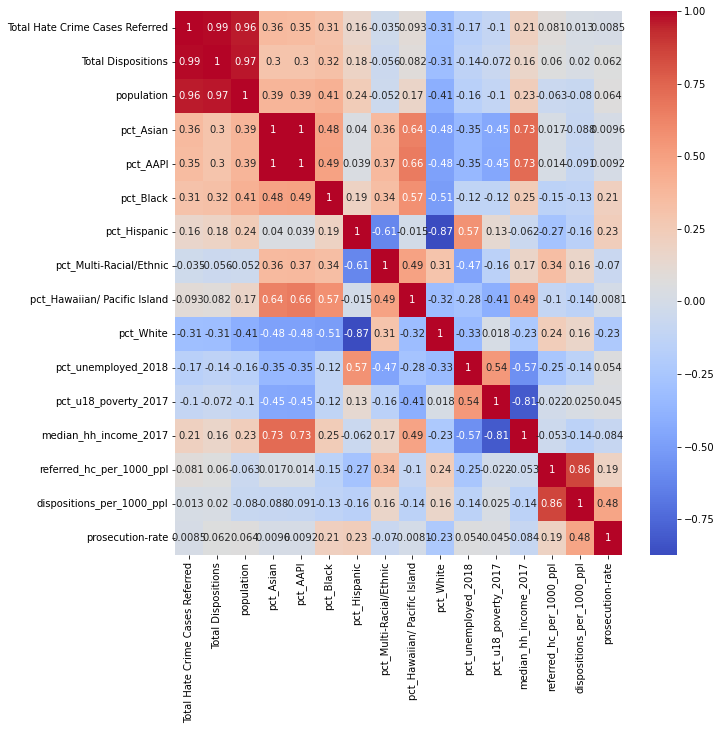

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df_pros.corr(),annot=True, cmap='coolwarm')

### Hate Crimes by Racial Population

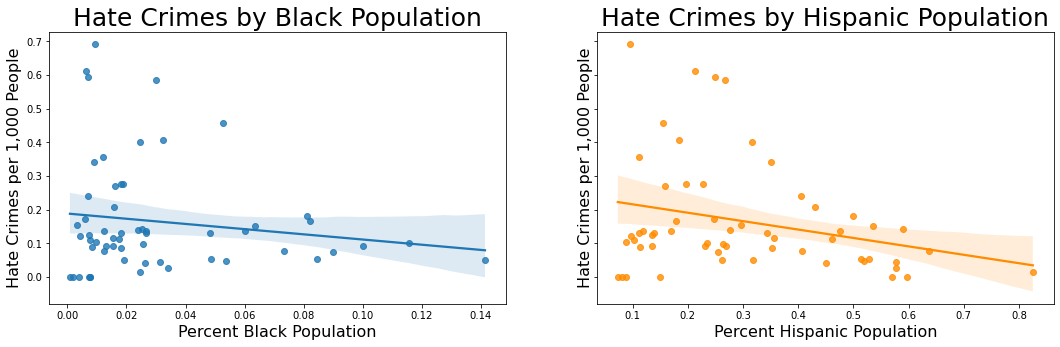

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(18, 5))
sns.regplot(data=df_pros, x='pct_Black', y='referred_hc_per_1000_ppl',ax=ax1)
ax1.set_title("Hate Crimes by Black Population", fontsize=25)
ax1.set_ylabel("Hate Crimes per 1,000 People", fontsize=16)
ax1.set_xlabel("Percent Black Population", fontsize=16)

sns.regplot(data=df_pros, x='pct_Hispanic', y='referred_hc_per_1000_ppl', ax=ax2, color='darkorange')
ax2.set_title("Hate Crimes by Hispanic Population", fontsize=25)
ax2.set_ylabel("Hate Crimes per 1,000 People", fontsize=16)
ax2.set_xlabel("Percent Hispanic Population", fontsize=16)

plt.savefig("../plots/HC_population_descending.png")

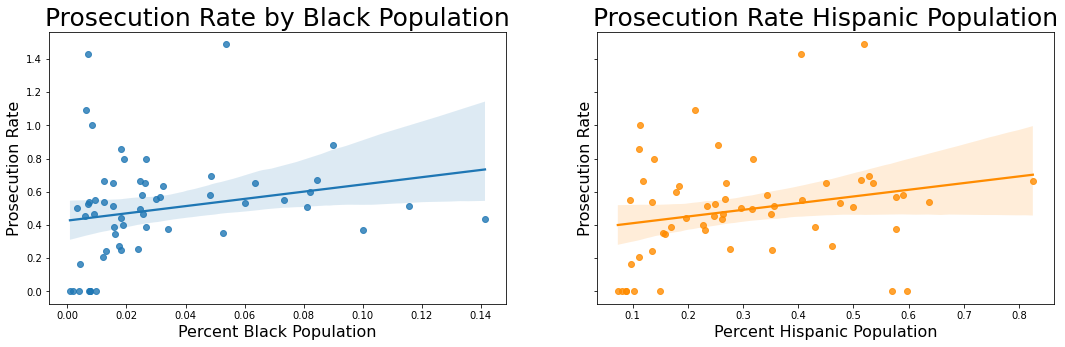

In [508]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(18, 5))
sns.regplot(data=df_pros, x='pct_Black', y='prosecution-rate',ax=ax1)
ax1.set_title("Prosecution Rate by Black Population", fontsize=25)
ax1.set_ylabel("Prosecution Rate", fontsize=16)
ax1.set_xlabel("Percent Black Population", fontsize=16)

sns.regplot(data=df_pros, x='pct_Hispanic', y='prosecution-rate', ax=ax2, color='darkorange')
ax2.set_title("Prosecution Rate Hispanic Population", fontsize=25)
ax2.set_ylabel("Prosecution Rate", fontsize=16)
ax2.set_xlabel("Percent Hispanic Population", fontsize=16)

plt.savefig("./plots/PR_population_descending.png")

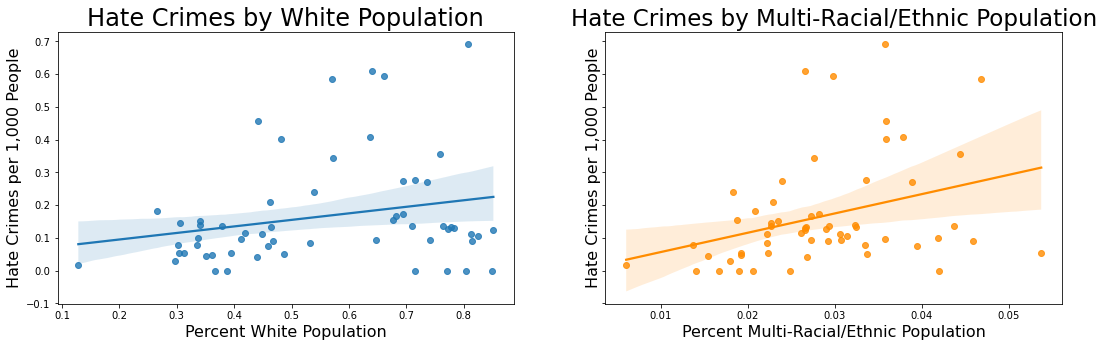

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(18, 5))
sns.regplot(data=df_pros, x='pct_White', y='referred_hc_per_1000_ppl',ax=ax1)
ax1.set_title("Hate Crimes by White Population", fontsize=24)
ax1.set_ylabel("Hate Crimes per 1,000 People", fontsize=16)
ax1.set_xlabel("Percent White Population", fontsize=16)

sns.regplot(data=df_pros, x='pct_Multi-Racial/Ethnic', y='referred_hc_per_1000_ppl', ax=ax2, color='darkorange')
ax2.set_title("Hate Crimes by Multi-Racial/Ethnic Population", fontsize=23)
ax2.set_ylabel("Hate Crimes per 1,000 People", fontsize=16)
ax2.set_xlabel("Percent Multi-Racial/Ethnic Population", fontsize=16)

plt.savefig("../plots/HC_population_ascending.png")

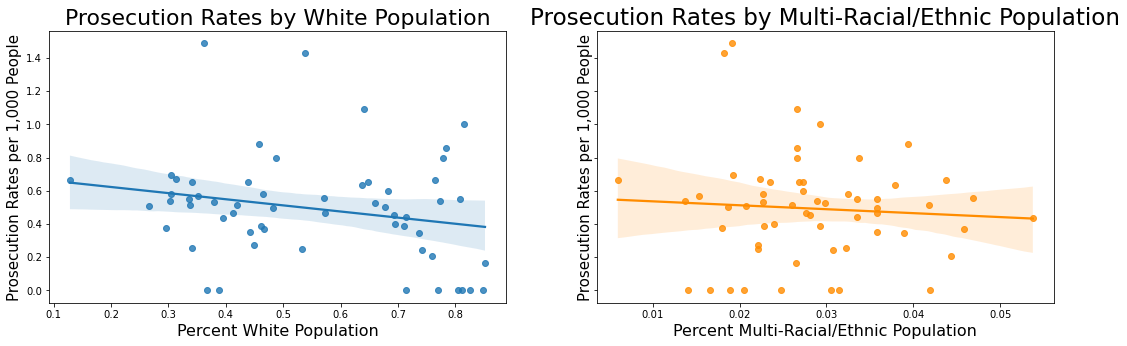

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(18, 5))
sns.regplot(data=df_pros, x='pct_White', y='prosecution-rate',ax=ax1)
ax1.set_title("Prosecution Rates by White Population", fontsize=22)
ax1.set_ylabel("Prosecution Rates per 1,000 People", fontsize=15)
ax1.set_xlabel("Percent White Population", fontsize=16)

sns.regplot(data=df_pros, x='pct_Multi-Racial/Ethnic', y='prosecution-rate', ax=ax2, color='darkorange')
ax2.set_title("Prosecution Rates by Multi-Racial/Ethnic Population", fontsize=23)
ax2.set_ylabel("Prosecution Rates per 1,000 People", fontsize=15)
ax2.set_xlabel("Percent Multi-Racial/Ethnic Population", fontsize=16)

plt.savefig("../plots/PR_population_ascending.png")

### Hate Crimes by Suspects/Biases

In [14]:
suspect_race = demo_classification.groupby(['SuspectsRaceAsAGroup']).size().sort_values(ascending=False).head(6)

In [15]:
suspect_race.head()

SuspectsRaceAsAGroup
Unknown                      10127
White                         7619
Black or African American     2729
Hispanic                      2708
Group of Multiple Races        772
dtype: int64

In [16]:
victim_bias = demo_classification.groupby(['MostSeriousBias']).size().sort_values(ascending=False).head(5)

In [17]:
victim_bias

MostSeriousBias
Anti-Black or African American        7508
Anti-Gay (Male)                       3198
Anti-Jewish                           2563
Anti-Hispanic or Latino               2414
Anti-Other Race/Ethnicity/Ancestry    1559
dtype: int64

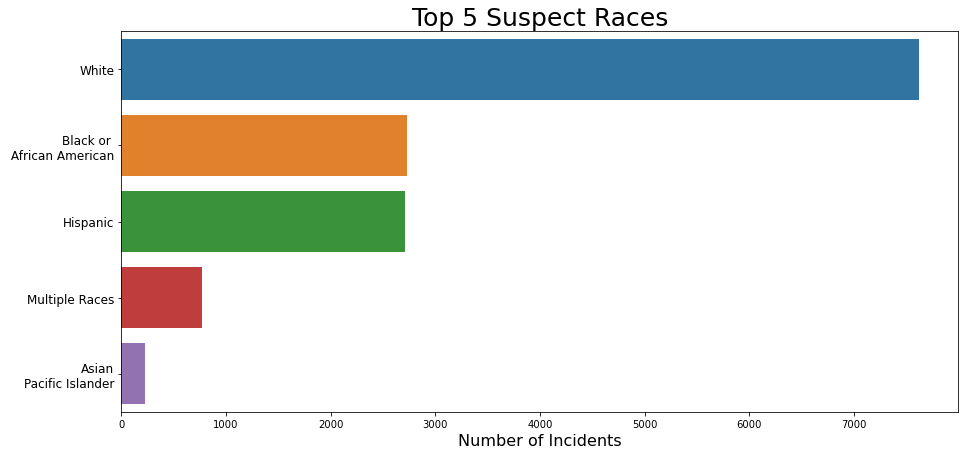

In [19]:
plt.figure(figsize=(15,7))
sns.barplot(y=suspect_race.index[1:], x=suspect_race[1:], orient='h')
plt.title('Top 5 Suspect Races', fontsize=25)
plt.xlabel('Number of Incidents', fontsize=16)
plt.ylabel("")
plt.yticks([0,1,2,3,4], labels=['White', 'Black or \n African American', 'Hispanic', 'Multiple Races', 'Asian\nPacific Islander'], fontsize=12)
plt.savefig("../plots/Suspect_Race.png")

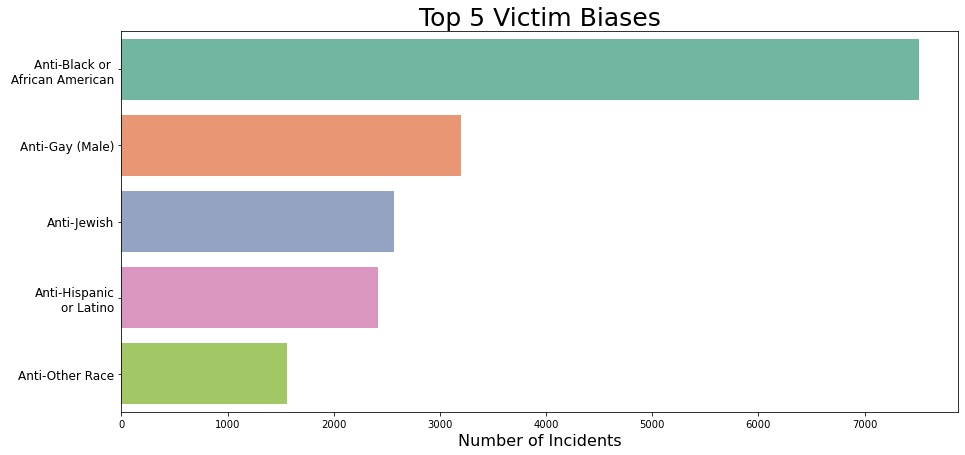

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(y=victim_bias.index, x=victim_bias, orient='h', palette=sns.color_palette('Set2', 5))
plt.title('Top 5 Victim Biases', fontsize=25)
plt.xlabel('Number of Incidents', fontsize=16)
plt.ylabel("")
plt.yticks([0,1,2,3,4], labels=['Anti-Black or \n African American', 'Anti-Gay (Male)', 'Anti-Jewish', 'Anti-Hispanic\nor Latino', 'Anti-Other Race'], fontsize=12)
plt.savefig("../plots/Victim_Bias.png")

In [21]:
suspect_bias = demo_classification.groupby(['SuspectsRaceAsAGroup', 'MostSeriousBias']).size().sort_values(ascending=False).head(16)
top_suspect_bias = suspect_bias.drop('Unknown', level=0, axis=0)

<Figure size 1080x720 with 0 Axes>

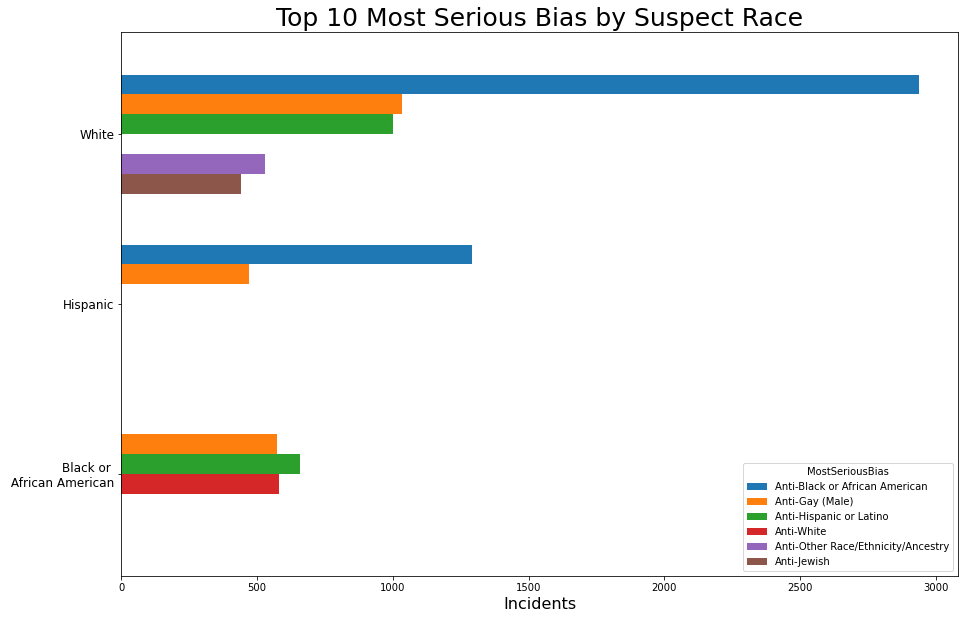

In [22]:
plt.figure(figsize=(15,10))
ax = top_suspect_bias.unstack().plot(kind='barh', figsize=(15,10), width=.7)
plt.yticks([0,1,2], labels=['White', 'Hispanic', 'Black or \n African American'], fontsize=12)
plt.ylabel("", fontsize=16)
plt.xlabel("Incidents", fontsize=16)
plt.title("Top 10 Most Serious Bias by Suspect Race", fontsize=25)
ax.invert_yaxis()

plt.savefig("../plots/Suspect_Bias.png")

## Correlations

### Heatmaps

Text(0.5, 1.0, 'Demographic Regression Heatmap')

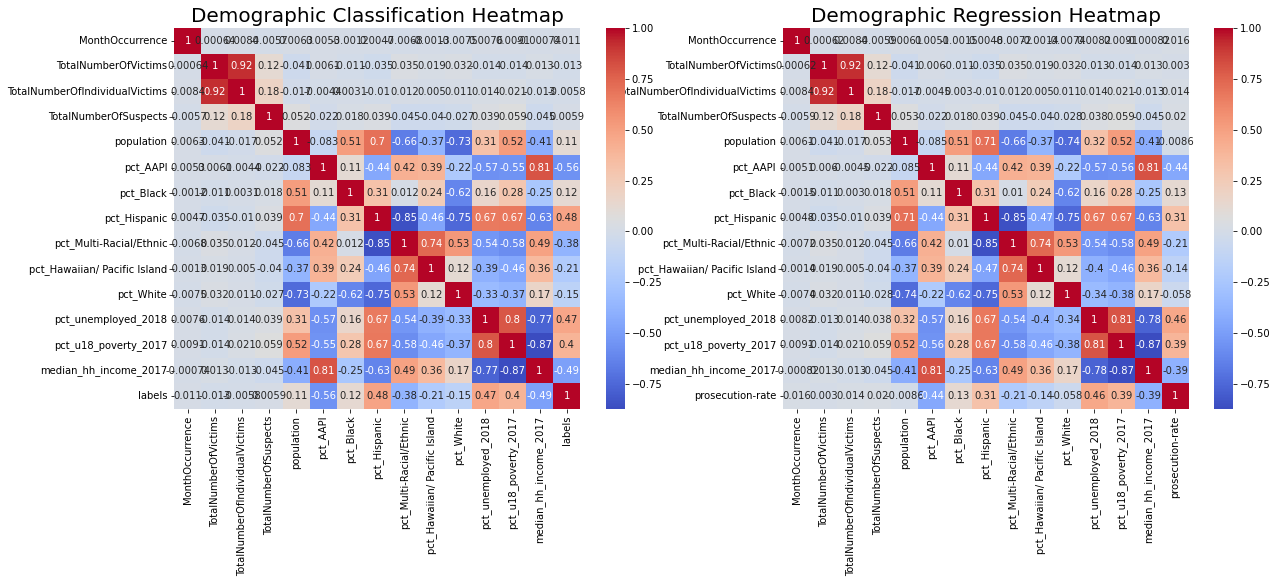

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))
sns.heatmap(demo_classification.corr(), annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title("Demographic Classification Heatmap", fontsize=20)

sns.heatmap(demo_regression.corr(), annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title("Demographic Regression Heatmap", fontsize=20)

### Turn Correlations into bar charts

In [24]:
#get label and prosecution-rate correlations
demo_labels_corr = demo_classification.corr()['labels'].sort_values(ascending=False)[1:]
demo_pros_rate_corr = demo_regression.corr()['prosecution-rate'].sort_values(ascending=False)[1:]

In [25]:
#function to make index names human readable
def rename_index(corr):
    new_index = {}
    for i in range(len(corr.index)):
        index = corr.index[i]
        index = index.replace("pct_", "% ")
        index = index.replace("_", " ")
        new_index[corr.index[i]] = index
    return corr.rename(new_index)

In [26]:
#find the 10 highest correlations
top_labels_corr = demo_labels_corr[np.abs(demo_labels_corr).sort_values(ascending=False)[:10].index].sort_values(ascending=False)
top_pros_rate_corr = demo_pros_rate_corr[np.abs(demo_pros_rate_corr).sort_values(ascending=False)[:10].index].sort_values(ascending=False)

#rename columns
top_labels_corr = rename_index(top_labels_corr)
top_pros_rate_corr = rename_index(top_pros_rate_corr)

In [27]:
#create palette
top_corr_cols = top_labels_corr.index.append(top_pros_rate_corr.index).drop_duplicates()
tcc_dict = {top_corr_cols[i] : sns.color_palette( n_colors=top_corr_cols.shape[0])[i] for i in range(len(top_corr_cols))}

''

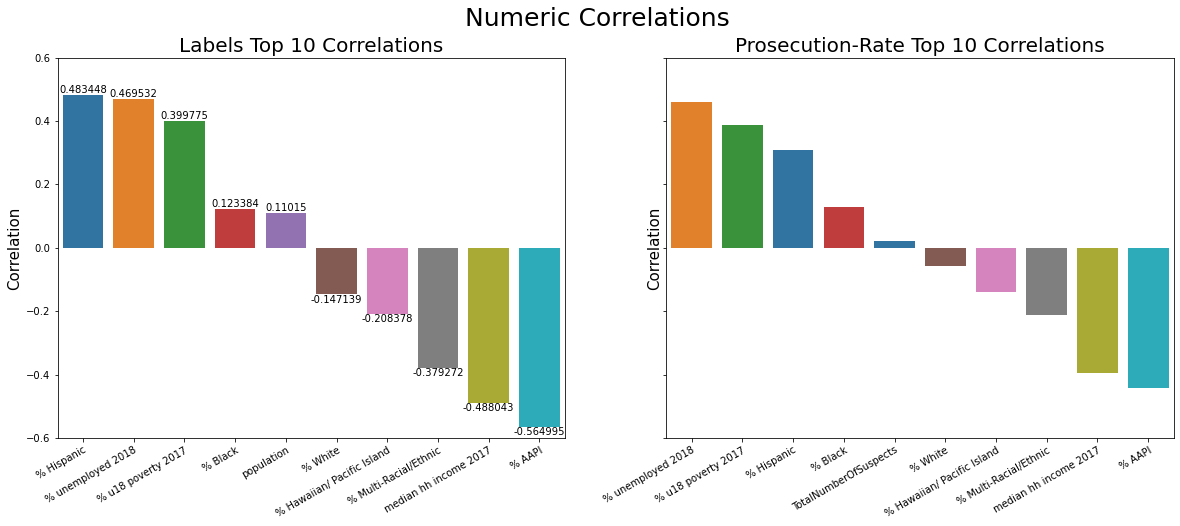

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20, 7))
plt.suptitle("Numeric Correlations", fontsize=25)
sns.barplot(x=top_labels_corr.index, y=top_labels_corr, ax=ax1, palette=tcc_dict)
ax1.set_xticklabels(labels=top_labels_corr.index,rotation=30, ha='right', rotation_mode='anchor')
ax1.set_title("Labels Top 10 Correlations", fontsize=20)
ax1.set_ylabel("Correlation", fontsize=15)
ax1.set_ylim((-.6, .6))
ax1.bar_label(ax1.containers[0])
sns.barplot(x=top_pros_rate_corr.index, y=top_pros_rate_corr, ax=ax2, palette=tcc_dict)
ax2.set_xticklabels(labels=top_pros_rate_corr.index,rotation=30, ha='right', rotation_mode='anchor')
ax2.set_title("Prosecution-Rate Top 10 Correlations", fontsize=20)
ax2.set_ylabel("Correlation", fontsize=15)

;

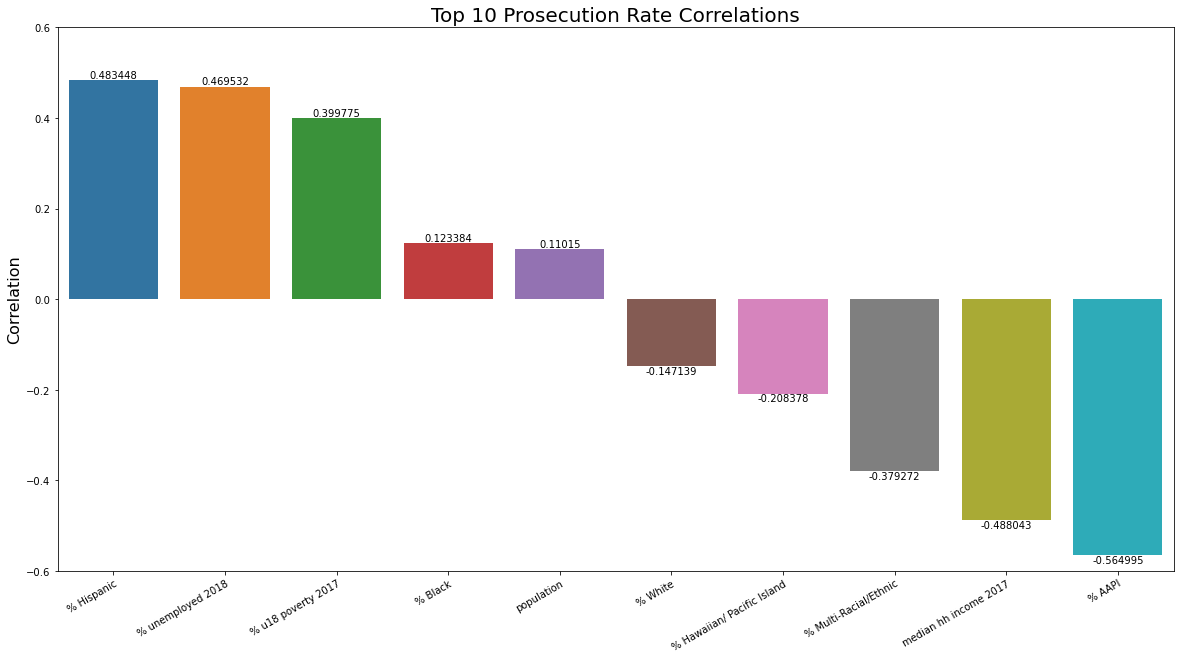

In [30]:
#just the classification chart
plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
sns.barplot(x=top_labels_corr.index, y=top_labels_corr, palette=tcc_dict)
ax1.set_xticklabels(labels=top_labels_corr.index,rotation=30, ha='right', rotation_mode='anchor')
ax1.set_title("Top 10 Prosecution Rate Correlations", fontsize=20)
ax1.set_ylabel("Correlation", fontsize=16)
ax1.set_ylim((-.6, .6))
ax1.bar_label(ax1.containers[0])

plt.savefig("../plots/correlations.png");

## Look at Chi2 Correlation

### Classification Chi2

In [31]:
#Source:
#Find P-Values for Categorical Features
class_cat = demo_classification.iloc[:,np.array(demo_classification.dtypes == 'O')].copy()
class_cat['labels'] = demo_classification['labels']

chi2 = []
for col in class_cat.columns:
    crosstab_res = pd.crosstab(index=class_cat[col], columns=class_cat['labels'])
    chi_res = chi2_contingency(crosstab_res)
    chi2.append([col, chi_res[1]])
class_cat_corr = pd.DataFrame(chi2).sort_values(by=1).drop(9)

In [32]:
class_cat_corr.rename({0: 'Feature', 1 : "P-Value"}, axis=1)

,Feature,P-Value
4,MostSeriousBias,1.095132e-92
0,SuspectsRaceAsAGroup,3.240169e-47
5,MostSeriousBiasType,1.298196e-31
3,MostSeriousLocation,2.886975e-22
7,WeaponType,3.272521e-22
8,Offensive_Act,4.130595e-20
6,MostSeriousVictimType,2.036284e-04
1,MostSeriousUcr,9.597574e-03
2,MostSeriousUcrType,4.976946e-01


### Greatest Correlation EDA

In [33]:
gby_labels = demo_classification.groupby('labels').agg([np.mean, np.median])

In [34]:
gby_labels

MonthOccurrence        TotalNumberOfVictims         \
                  mean median                 mean median   
labels                                                      
0             6.357992    6.0             1.258792    1.0   
1             6.433371    6.0             1.193989    1.0   
2             6.500199    7.0             1.240748    1.0   

       TotalNumberOfIndividualVictims        TotalNumberOfSuspects         \
                                 mean median                  mean median   
labels                                                                      
0                            1.108659    1.0              0.997575    1.0   
1                            1.061404    1.0              1.079157    1.0   
2                            1.105452    1.0              1.004377    1.0   

          population              ... pct_Hawaiian/ Pacific Island            \
                mean      median  ...                         mean    median   
labels                            ...                                          
0       1.200235e+06    883869.0  ...                     0.004727  0.003895   
1       6.337377e+06  10253716.0  ...                     0.003323  0.002399   
2       1.156970e+06   1018241.0  ...                     0.003075  0.002941   

       pct_White           pct_unemployed_2018        pct_u18_poverty_2017  \
            mean    median                mean median                 mean   
labels                                                                       
0       0.455888  0.441525            0.029523  0.026             0.129538   
1       0.352757  0.265676            0.042316  0.047             0.181751   
2       0.414667  0.361341            0.051249  0.040             0.199861   

              median_hh_income_2017            
       median                  mean    median  
labels                                         
0       0.123          96996.164443  109601.0  
1       0.209          70796.020449   64912.0  
2       0.230          66742.457620   60270.0  

[3 rows x 28 columns]

In [35]:
top_labels_corr

% Hispanic                    0.483448
% unemployed 2018             0.469532
% u18 poverty 2017            0.399775
% Black                       0.123384
population                    0.110150
% White                      -0.147139
% Hawaiian/ Pacific Island   -0.208378
% Multi-Racial/Ethnic        -0.379272
median hh income 2017        -0.488043
% AAPI                       -0.564995
Name: labels, dtype: float64

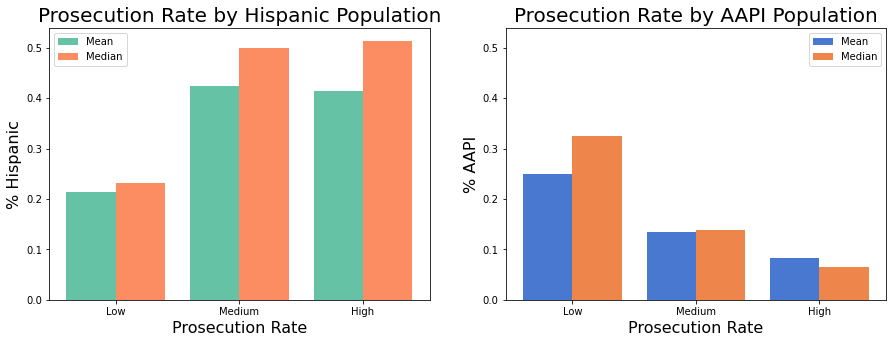

In [36]:
plt.figure(figsize=(15,5))
n=np.arange(0,3)
w=.4
ax1 = plt.subplot(1,2,2)
ax1.bar(n, gby_labels['pct_AAPI']['mean'], width=w, color=sns.color_palette('muted')[0], label='Mean')
ax1.bar(n+w, gby_labels['pct_AAPI']['median'], width=w,color=sns.color_palette('muted')[1], label='Median')
ax1.set_xticks([0.2,1.2,2.2])
ax1.set_xticklabels(['Low', 'Medium', 'High'])
ax1.set_xlabel("Prosecution Rate", fontsize=16)
ax1.set_title("Prosecution Rate by AAPI Population", fontsize=20)
ax1.set_ylabel("% AAPI", fontsize=16)
ax1.legend()

ax2 = plt.subplot(1,2,1, sharey=ax1, sharex=ax1)
ax2.bar(n, gby_labels['pct_Hispanic']['mean'], width=w, color=sns.color_palette('Set2')[0],label='Mean')
ax2.bar(n+w, gby_labels['pct_Hispanic']['median'], width=w, color=sns.color_palette('Set2')[1],label='Median')
ax2.set_xlabel("Prosecution Rate", fontsize=16)
ax2.set_title("Prosecution Rate by Hispanic Population", fontsize=20)
ax2.set_ylabel("% Hispanic", fontsize=16)
ax2.legend()

plt.savefig("../plots/top_corr_pop.png")

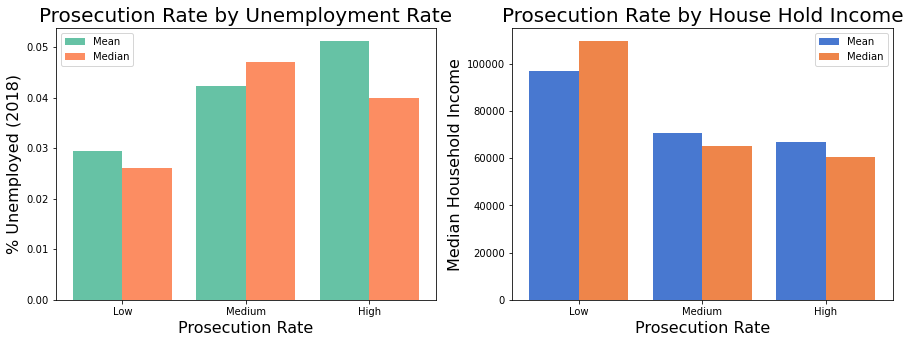

In [37]:
plt.figure(figsize=(15,5))
n=np.arange(0,3)
w=.4
ax1 = plt.subplot(1,2,2)
ax1.bar(n, gby_labels['median_hh_income_2017']['mean'], width=w, color=sns.color_palette('muted')[0], label='Mean')
ax1.bar(n+w, gby_labels['median_hh_income_2017']['median'], width=w,color=sns.color_palette('muted')[1], label='Median')
ax1.set_xticks([0.2,1.2,2.2])
ax1.set_xticklabels(['Low', 'Medium', 'High'])
ax1.set_xlabel("Prosecution Rate", fontsize=16)
ax1.set_title("Prosecution Rate by House Hold Income", fontsize=20)
ax1.set_ylabel("Median Household Income", fontsize=16)
ax1.legend()

ax2 = plt.subplot(1,2,1, sharex=ax1)
ax2.bar(n, gby_labels['pct_unemployed_2018']['mean'], width=w, color=sns.color_palette('Set2')[0],label='Mean')
ax2.bar(n+w, gby_labels['pct_unemployed_2018']['median'], width=w, color=sns.color_palette('Set2')[1],label='Median')
ax2.set_xlabel("Prosecution Rate", fontsize=16)
ax2.set_title("Prosecution Rate by Unemployment Rate", fontsize=20)
ax2.set_ylabel("% Unemployed (2018)", fontsize=16)
ax2.legend()

plt.savefig("../plots/top_corr_2.png")

#### Bias Motivation Distrubtion Across Labels

In [38]:
bias = demo_classification.groupby(['labels','MostSeriousBias'])['MonthOccurrence'].count()

#map names for reading ease
bias_mapping = {
    'Anti-Other Race/Ethnicity/Ancestry' : "Anti-Other Race",
    "Anti-Lesbian/Gay/Bisexual or Transgender (Mixed Group)" : "Anti-LGBTQ",
}

bias_0 = bias[0].sort_values(ascending=False).head(6).rename(index=bias_mapping)
bias_1 = bias[1].sort_values(ascending=False).head(6).rename(index=bias_mapping)
bias_2 = bias[2].sort_values(ascending=False).head(6).rename(index=bias_mapping)

In [39]:
#create palette 
biases = bias_0.index.append(bias_1.index).append(bias_2.index)
biases.drop_duplicates()

bias_colors = {biases[i] : sns.color_palette('colorblind', n_colors=biases.shape[0])[i] for i in range(len(biases))}

''

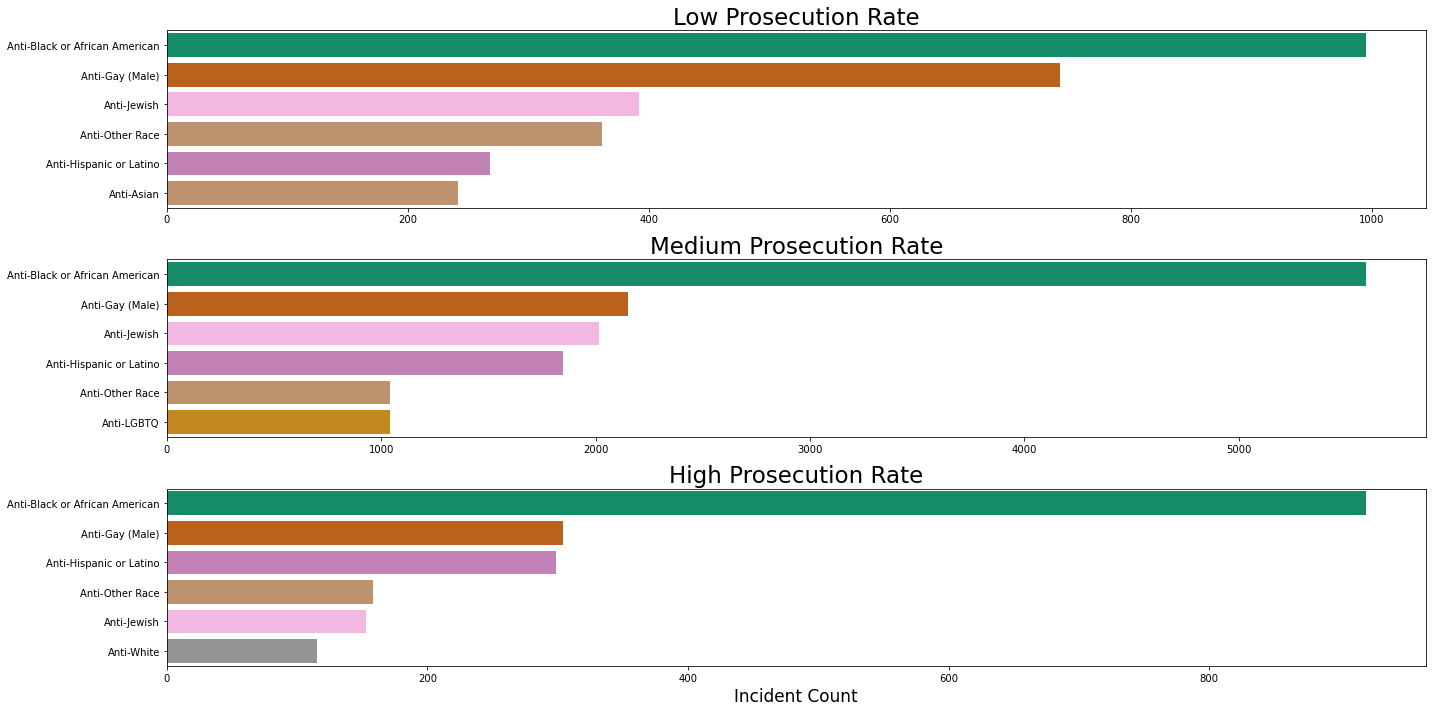

In [40]:
plt.figure(figsize=(20,10))
#plt.suptitle("Bias Motivation Counts by Label", fontsize=30)

ax = plt.subplot(3,1,1)
sns.barplot(y=bias_0.index, x=bias_0, orient='h', ax=ax, palette=bias_colors)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Low Prosecution Rate", fontsize=23)
ax1 = plt.subplot(3,1,2)

sns.barplot(y=bias_1.index, x=bias_1, orient='h', ax=ax1, palette=bias_colors)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title("Medium Prosecution Rate", fontsize=23)


ax2 = plt.subplot(3,1,3)
sns.barplot(y=bias_2.index, x=bias_2, orient='h', ax=ax2, palette=bias_colors)
ax2.set_xlabel("Incident Count", fontsize=17)
ax2.set_ylabel("")
ax2.set_title("High Prosecution Rate", fontsize=23)

plt.tight_layout()
#plt.savefig("./plots/biases_by_label.png")
;